In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('ratings.csv')
group = df.groupby('movieId')
dt=group.describe()['rating']
dt.to_csv('ratings_full.csv')
#ratings=pd.read_csv('ratings_new.csv')
links=pd.read_csv('links.csv')
ratings_full=pd.merge(dt,links,on='movieId')
ratings_full.to_csv('ratings_full_id.csv')

In [3]:
df_rate=pd.read_csv('ratings_full_id.csv')
df_vote=pd.read_csv('cleaned_meta.csv')

merge=pd.merge(df_rate,df_vote,left_on='tmdbId',right_on='id')

merge.to_csv('rate_full_vote.csv')

d:\miniconda\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (18,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


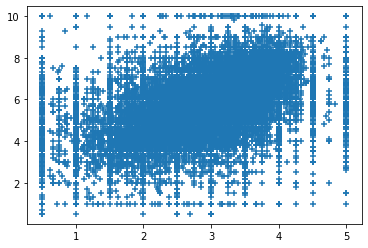

In [6]:
plt.scatter(merge['mean'],merge['vote_average'],marker='+')
plt.show()

In [7]:
def two_mult(num):
    return num['mean']*2

In [8]:
merge.loc[:,"rate_mult"] = merge.apply(two_mult,axis=1)

In [9]:
print(merge['rate_mult'].describe())

count    39083.000000
mean         6.141168
std          1.415238
min          1.000000
25%          5.434783
50%          6.333333
75%          7.013381
max         10.000000
Name: rate_mult, dtype: float64


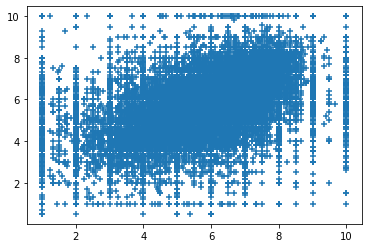

In [10]:
plt.scatter(merge['rate_mult'],merge['vote_average'],marker='+')
plt.show()

In [11]:
merge.loc[:,"difference"] = merge["rate_mult"] - merge["vote_average"]
print(merge['difference'])

0        0.076315
1       -0.426094
2       -0.148900
3       -0.348574
4        0.459130
           ...   
39078   -1.000000
39079    0.000000
39080    0.500000
39081    3.000000
39082    1.000000
Name: difference, Length: 39083, dtype: float64


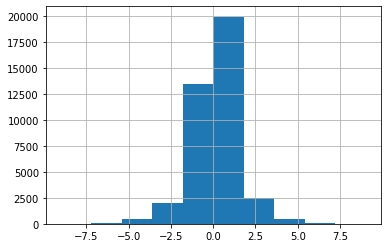

In [12]:
merge['difference'].hist()
plt.show()

In [18]:
def drop_not(num):
    if num['difference']<-2.5 or num['difference']>2.5:
        return 1
    else:
        return 0

In [19]:
merge.loc[:,"drop_not"] = merge.apply(drop_not,axis=1)

In [20]:
merge['drop_not'].value_counts()

0    36229
1     2854
Name: drop_not, dtype: int64

In [21]:
df_out=merge.replace(0,np.nan)
df_out=df_out.dropna(subset=['drop_not'])

In [23]:
df_out.to_csv('rate_full_vote_difference.csv')

In [2]:
df=pd.read_csv('rate_full_vote_difference.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0_x,movieId,count,mean,std,min,25%,50%,75%,...,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,rate_mult,difference,drop_not
0,82,82.0,83,617.0,3.649109,1.025473,0.5,3.0,4.0,4.0,...,Drama,NaN,NaN,NaN,NaN,NaN,NaN,7.298217,2.798217,1.0
1,131,135.0,137,242.0,3.301653,1.164801,1.0,3.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.603306,2.803306,1.0
2,135,141.0,143,15.0,2.200000,1.424279,0.5,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,-2.600000,1.0
3,180,187.0,189,343.0,3.007289,0.860490,1.0,3.0,3.0,3.0,...,Comedy,Drama,NaN,NaN,NaN,NaN,NaN,6.014577,-3.985423,1.0
4,216,223.0,226,48.0,2.687500,1.070022,1.0,2.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.375000,2.875000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,39060,45086.0,176207,1.0,0.500000,NaN,0.5,0.5,0.5,0.5,...,Mystery,Thriller,Horror,NaN,NaN,NaN,NaN,1.000000,-2.700000,1.0
2850,39063,45089.0,176215,1.0,1.500000,NaN,1.5,1.5,1.5,1.5,...,Fantasy,Horror,NaN,NaN,NaN,NaN,NaN,3.000000,-2.800000,1.0
2851,39064,45090.0,176217,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,...,Family,TV Movie,NaN,NaN,NaN,NaN,NaN,10.000000,5.000000,1.0
2852,39076,45105.0,176253,1.0,4.500000,NaN,4.5,4.5,4.5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,3.000000,1.0


In [4]:
df['popularity']

0       0.252287
1       0.540436
2       0.918504
3       0.119713
4       0.155859
          ...   
2849    1.270832
2850    0.143223
2851    0.767762
2852    0.225051
2853    0.072051
Name: popularity, Length: 2854, dtype: float64

In [5]:
df['popularity'].describe()

count    2854.000000
mean        0.834534
std         2.101699
min         0.000001
25%         0.144754
50%         0.433457
75%         0.910003
max        60.581223
Name: popularity, dtype: float64

In [18]:
df['genre_1'].value_counts()

Drama              288
Comedy             166
Romance            165
Thriller           118
Action              98
Family              83
Horror              81
Adventure           69
Crime               67
Music               59
Science Fiction     57
Fantasy             56
Foreign             54
History             34
Documentary         34
Mystery             32
Animation           29
TV Movie            25
War                 21
Western             20
Name: genre_1, dtype: int64

In [19]:
df['genre_2'].value_counts()

Romance            93
Thriller           92
Drama              89
Comedy             43
Family             41
Mystery            38
Foreign            34
Science Fiction    30
Adventure          28
Action             28
Fantasy            28
Crime              24
Horror             22
War                15
Animation          14
TV Movie           13
Music              11
History             8
Western             6
Documentary         4
Name: genre_2, dtype: int64

In [20]:
df['genre_3'].value_counts()

Science Fiction    24
Thriller           23
Romance            21
Foreign            21
Crime              12
Fantasy            11
Mystery            11
Family             11
Comedy              8
Drama               8
Adventure           7
War                 6
Horror              6
Western             4
History             3
TV Movie            3
Action              2
Music               1
Documentary         1
Name: genre_3, dtype: int64

In [21]:
df['genre_4'].value_counts()

Family             8
Thriller           7
Romance            7
Foreign            5
Western            4
Science Fiction    3
Fantasy            3
Comedy             3
Mystery            2
Drama              2
War                1
TV Movie           1
Music              1
Name: genre_4, dtype: int64

In [22]:
df['genre_5'].value_counts()

Foreign            3
History            1
Family             1
Science Fiction    1
Romance            1
Adventure          1
Name: genre_5, dtype: int64

In [47]:
production_list=[]
for productions in df['production_companies']:
    productions=eval(productions)
    if len(productions)>0:
        for production in productions:
            production_list.append(production['name'])

counts = pd.value_counts(production_list)

        

In [48]:
counts

Metro-Goldwyn-Mayer (MGM)                 47
Warner Bros.                              34
Paramount Pictures                        30
Universal Pictures                        25
Twentieth Century Fox Film Corporation    25
                                          ..
Golan-Globus Productions                   1
John Proffitt Films                        1
Beard Collins Shores Productions           1
ITC Entertainment                          1
Bossa Nova Productions                     1
Length: 2287, dtype: int64

In [49]:
cast=pd.read_csv('credits.csv')

In [50]:
cast_merge=pd.merge(cast,df,left_on='id',right_on='tmdbId')

In [54]:
cast_merge['id_x']

0       146599
1         5757
2       249882
3        58372
4        61813
         ...  
2855     45527
2856     84710
2857     39562
2858     67179
2859    439050
Name: id_x, Length: 2860, dtype: int64

In [55]:
cast_df=pd.read_csv('cast.csv')

In [59]:
cast_merge_df=pd.merge(cast_df,cast_merge,left_on='movie',right_on='id_x')

C:\Users\andrewli\AppData\Local\Temp/ipykernel_9416/3959544620.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_y'} in the result is deprecated and will raise a MergeError in a future version.
  cast_merge_df=pd.merge(cast_df,cast_merge,left_on='movie',right_on='id_x')


In [61]:
cast_merge_df['actor'].value_counts()

Joan Sims                10
Charles Hawtrey          10
Sid James                 9
Donald Pleasence          9
Kenneth Williams          8
                         ..
Ruben Santiago-Hudson     1
Michelle Phillips         1
Glynn Turman              1
Cybill Shepherd           1
Elham Korda               1
Name: actor, Length: 16093, dtype: int64

In [62]:
director=pd.read_csv('director.csv')

In [63]:
director_merge_df=pd.merge(director,cast_merge,left_on='movie',right_on='id_x')

C:\Users\andrewli\AppData\Local\Temp/ipykernel_9416/3398852259.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_y'} in the result is deprecated and will raise a MergeError in a future version.
  director_merge_df=pd.merge(director,cast_merge,left_on='movie',right_on='id_x')


In [64]:
director_merge_df['name'].value_counts()

Gerald Thomas           11
Michael Feifer           7
Ron Oliver               6
Frank Capra              6
Harun Farocki            5
                        ..
Carl Macek               1
Bob Bralver              1
Charles Martin Smith     1
William A. Levey         1
Hamid Nematollah         1
Name: name, Length: 2596, dtype: int64